In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as sts
import numpy as np
import scipy.stats as st
from scipy.stats import linregress

In [3]:
NBA_JT_df = "MASTER_NBA_DATA.csv"
# Read our Data file with the pandas library
# Not every CSV requires an encoding, but be aware this can come up
NBA_JT_df = pd.read_csv(NBA_JT_df, encoding="ISO-8859-1")
# Show just the header
NBA_JT_df

,GameID,Date,City,Country,Home Team,Away Team,Attendance,Home Score,Home 1st Q,Home FG%,Home 3pt%,Home FT%,Away Score,Away 1st Q,Away FG%,Away 3pt%,Away FT%
0,4c06f6af-980b-41b3-85c3-5975d8e03956,2018-10-17T00:00:00+00:00,Boston,USA,Celtics,76ers,18624,105,21,43.3,29.7,71.4,87,21,39.1,19.2,60.9
1,3594f3a2-86b8-4337-83d3-269c078c7f1f,2018-10-17T02:30:00+00:00,Oakland,USA,Warriors,Thunder,19596,108,31,44.2,26.9,94.4,100,23,36.3,27.0,64.9
2,24b19539-d496-460a-9e9b-2194d0fcc82a,2018-10-17T23:00:00+00:00,Detroit,USA,Pistons,Nets,20332,103,24,42.4,25.0,86.4,100,29,48.8,18.5,68.2
3,35a15ba5-77f8-45f5-91a6-79bbc3fbf989,2018-10-17T23:00:00+00:00,Charlotte,USA,Hornets,Bucks,17889,112,23,44.6,42.1,63.6,113,36,49.4,41.2,75.0
4,b83e3709-b996-4df3-b448-af91c5566187,2018-10-17T23:00:00+00:00,Indianapolis,USA,Pacers,Grizzlies,17923,111,27,56.6,38.5,53.8,83,16,29.8,34.5,82.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2221,2e7659ab-50fe-4048-b896-4a3b9ca346f9,2020-03-11T00:00:00+00:00,San Antonio,USA,Spurs,Mavericks,18064,107,26,46.8,28.9,81.5,131,35,50.0,45.5,100.0
2222,3f682d28-3eca-4448-b4a3-c32b9130e091,2020-03-11T00:00:00+00:00,Houston,USA,Rockets,Timberwolves,20172,124,34,50.6,42.4,81.3,106,29,46.4,31.4,68.0
2223,3c13e4eb-7367-4817-9ddd-48366bda87ab,2020-03-11T02:00:00+00:00,Portland,USA,Trail Blazers,Suns,19600,98,40,46.4,34.1,83.3,109,22,45.1,50.0,81.8
2224,bacce297-90ca-45ac-a472-0b7cf57c352e,2020-03-11T02:30:00+00:00,Los Angeles,USA,Lakers,Nets,15393,131,24,45.3,34.1,80.8,136,33,53.2,39.3,73.5


In [5]:
quartiles = NBA_JT_df['Attendance'].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

print(f"The lower quartile of occupancy is: {lowerq}")
print(f"The upper quartile of occupancy is: {upperq}")
print(f"The interquartile range of occupancy is: {iqr}")
print(f"The the median of occupancy is: {quartiles[0.5]} ")

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {lower_bound} could be outliers.")
print(f"Values above {upper_bound} could be outliers.")

The lower quartile of occupancy is: 16718.0
The upper quartile of occupancy is: 19432.0
The interquartile range of occupancy is: 2714.0
The the median of occupancy is: 18203.0 
Values below 12647.0 could be outliers.
Values above 23503.0 could be outliers.


In [6]:
# Bins are 0, 59.9, 69.9, 79.9, 89.9, 100.   
bins = [0, 16394, 18203, 19432, 23989]

# Create the names for the five bins
group_names = ["1Q Atten", "2Q Atten", "3Q Atten", "4Q Atten"]

In [7]:
# Slice the data and place it into bins
pd.cut(NBA_JT_df["Attendance"], bins, labels=group_names).head()
# Place the data series into a new column inside of the DataFrame
NBA_JT_df["Attendance Group"] = pd.cut(NBA_JT_df["Attendance"], bins, labels=group_names)
NBA_JT_df

,GameID,Date,City,Country,Home Team,Away Team,Attendance,Home Score,Home 1st Q,Home FG%,Home 3pt%,Home FT%,Away Score,Away 1st Q,Away FG%,Away 3pt%,Away FT%,Attendance Group
0,4c06f6af-980b-41b3-85c3-5975d8e03956,2018-10-17T00:00:00+00:00,Boston,USA,Celtics,76ers,18624,105,21,43.3,29.7,71.4,87,21,39.1,19.2,60.9,3Q Atten
1,3594f3a2-86b8-4337-83d3-269c078c7f1f,2018-10-17T02:30:00+00:00,Oakland,USA,Warriors,Thunder,19596,108,31,44.2,26.9,94.4,100,23,36.3,27.0,64.9,4Q Atten
2,24b19539-d496-460a-9e9b-2194d0fcc82a,2018-10-17T23:00:00+00:00,Detroit,USA,Pistons,Nets,20332,103,24,42.4,25.0,86.4,100,29,48.8,18.5,68.2,4Q Atten
3,35a15ba5-77f8-45f5-91a6-79bbc3fbf989,2018-10-17T23:00:00+00:00,Charlotte,USA,Hornets,Bucks,17889,112,23,44.6,42.1,63.6,113,36,49.4,41.2,75.0,2Q Atten
4,b83e3709-b996-4df3-b448-af91c5566187,2018-10-17T23:00:00+00:00,Indianapolis,USA,Pacers,Grizzlies,17923,111,27,56.6,38.5,53.8,83,16,29.8,34.5,82.1,2Q Atten
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2221,2e7659ab-50fe-4048-b896-4a3b9ca346f9,2020-03-11T00:00:00+00:00,San Antonio,USA,Spurs,Mavericks,18064,107,26,46.8,28.9,81.5,131,35,50.0,45.5,100.0,2Q Atten
2222,3f682d28-3eca-4448-b4a3-c32b9130e091,2020-03-11T00:00:00+00:00,Houston,USA,Rockets,Timberwolves,20172,124,34,50.6,42.4,81.3,106,29,46.4,31.4,68.0,4Q Atten
2223,3c13e4eb-7367-4817-9ddd-48366bda87ab,2020-03-11T02:00:00+00:00,Portland,USA,Trail Blazers,Suns,19600,98,40,46.4,34.1,83.3,109,22,45.1,50.0,81.8,4Q Atten
2224,bacce297-90ca-45ac-a472-0b7cf57c352e,2020-03-11T02:30:00+00:00,Los Angeles,USA,Lakers,Nets,15393,131,24,45.3,34.1,80.8,136,33,53.2,39.3,73.5,1Q Atten


In [8]:
# Create a GroupBy object based upon "View Group"
NBA_group = NBA_JT_df.groupby("Attendance Group")


# Get the average of each column within the GroupBy object
NBA_group[["Home Score", "Home 1st Q", "Home FG%","Home 3pt%","Home FT%","Away Score","Away 1st Q","Away FG%","Away 3pt%","Away FT%" ]].mean()

,Home Score,Home 1st Q,Home FG%,Home 3pt%,Home FT%,Away Score,Away 1st Q,Away FG%,Away 3pt%,Away FT%
Attendance Group,,,,,,,,,,
1Q Atten,111.826087,27.776398,46.476190,35.625259,76.424638,111.122153,27.714286,46.267288,35.600828,77.164182
2Q Atten,113.397321,28.318452,46.514137,35.650446,75.930357,110.910714,27.989583,45.603571,35.293601,76.718452
3Q Atten,111.797468,28.110307,46.615732,36.326582,77.390778,108.417722,26.974684,45.206329,34.743761,76.644123
4Q Atten,112.886100,28.805019,46.869884,36.227413,77.179730,109.457529,27.324324,45.308301,35.092664,76.711004


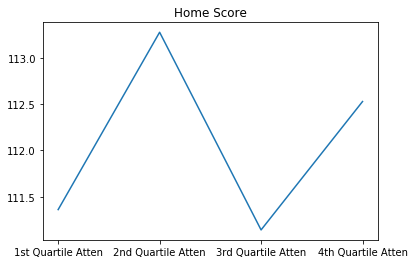

In [9]:
x = ["1st Quartile Atten", "2nd Quartile Atten", "3rd Quartile Atten", "4th Quartile Atten"]
y = [111.36, 113.28, 111.14, 112.53]
plt.plot(x, y)
plt.title("Home Score")
plt.savefig("../HomeScore.png")

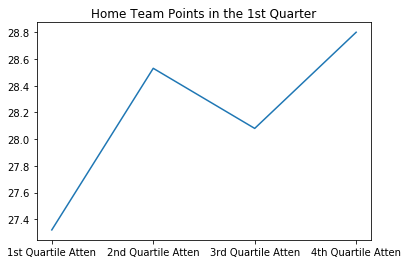

In [10]:
x = ["1st Quartile Atten", "2nd Quartile Atten", "3rd Quartile Atten", "4th Quartile Atten"]
y = [27.32, 28.53, 28.08, 28.80]
plt.plot(x, y)
plt.title("Home Team Points in the 1st Quarter")
plt.savefig("../Home_1stQ_points.png")

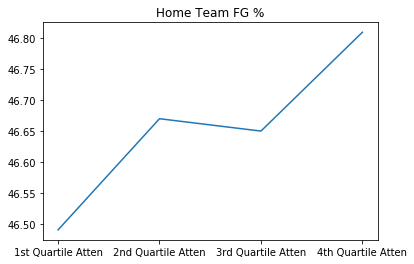

In [11]:
x = ["1st Quartile Atten", "2nd Quartile Atten", "3rd Quartile Atten", "4th Quartile Atten"]
y = [46.49, 46.67, 46.65, 46.81]
plt.plot(x, y)
plt.title("Home Team FG %")
plt.savefig("../HomeFG%.png")

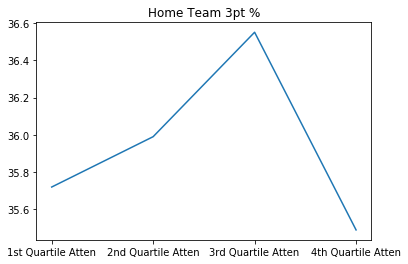

In [12]:
x = ["1st Quartile Atten", "2nd Quartile Atten", "3rd Quartile Atten", "4th Quartile Atten"]
y = [35.72, 35.99, 36.55, 35.49]
plt.plot(x, y)
plt.title("Home Team 3pt %")
plt.savefig("../Home3pt%.png")

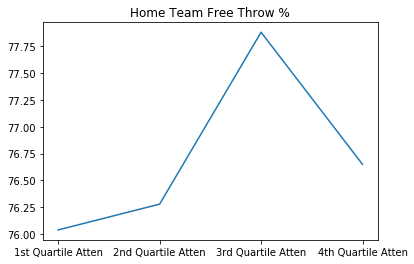

In [13]:
x = ["1st Quartile Atten", "2nd Quartile Atten", "3rd Quartile Atten", "4th Quartile Atten"]
y = [76.04, 76.28, 77.88, 76.65]
plt.plot(x, y)
plt.title("Home Team Free Throw %")
plt.savefig("../HomeFT%.png")

Text(0.5, 1.0, 'Home Team Free Throw %')

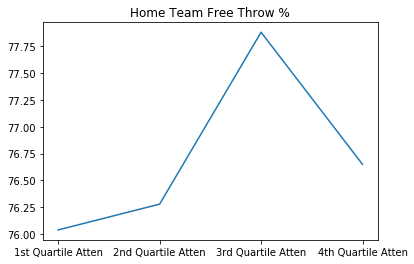

In [14]:
x = ["1st Quartile Atten", "2nd Quartile Atten", "3rd Quartile Atten", "4th Quartile Atten"]
y = [76.04, 76.28, 77.88, 76.65]
plt.plot(x, y)
plt.title("Home Team Free Throw %")

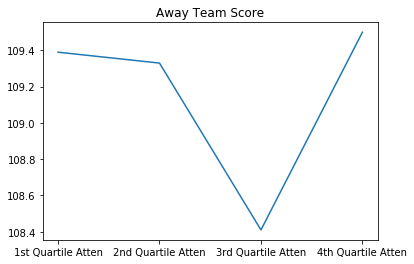

In [15]:
x = ["1st Quartile Atten", "2nd Quartile Atten", "3rd Quartile Atten", "4th Quartile Atten"]
y = [109.39, 109.33, 108.41, 109.50]
plt.plot(x, y)
plt.title("Away Team Score")
plt.savefig("../AwayScore.png")

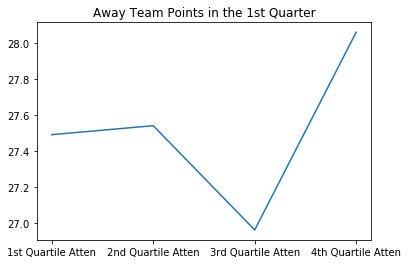

In [16]:
x = ["1st Quartile Atten", "2nd Quartile Atten", "3rd Quartile Atten", "4th Quartile Atten"]
y = [27.49, 27.54, 26.96, 28.06]
plt.plot(x, y)
plt.title("Away Team Points in the 1st Quarter")
plt.savefig("../Away_1stQ_points.png")

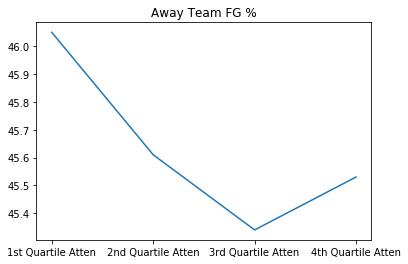

In [17]:
x = ["1st Quartile Atten", "2nd Quartile Atten", "3rd Quartile Atten", "4th Quartile Atten"]
y = [46.05, 45.61, 45.34, 45.53]
plt.plot(x, y)
plt.title("Away Team FG %")
plt.savefig("../AwayFG%.png")

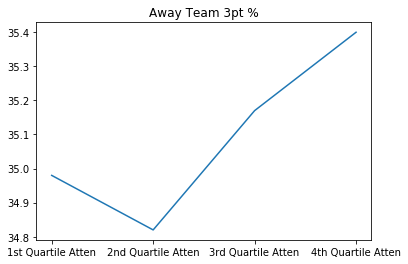

In [18]:
x = ["1st Quartile Atten", "2nd Quartile Atten", "3rd Quartile Atten", "4th Quartile Atten"]
y = [34.98, 34.82, 35.17, 35.40]
plt.plot(x, y)
plt.title("Away Team 3pt %")
plt.savefig("../Away3pt%.png")

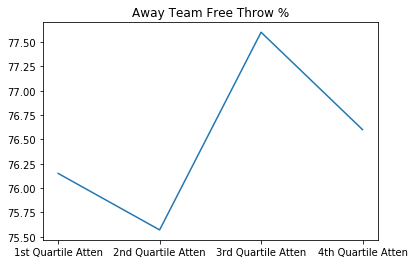

In [19]:
x = ["1st Quartile Atten", "2nd Quartile Atten", "3rd Quartile Atten", "4th Quartile Atten"]
y = [76.15, 75.57, 77.60, 76.60]
plt.plot(x, y)
plt.title("Away Team Free Throw %")
plt.savefig("../AwayFT%.png")

In [21]:
home_team_stats = NBA_JT_df.groupby(["Home Team"])

AvgAtten = home_team_stats["Attendance"].mean()

home_score =  home_team_stats["Home Score"].mean()
away_score =  home_team_stats["Away Score"].mean()

FG_percent = home_team_stats["Home FG%"].mean()
away_FG_percent = home_team_stats["Away FG%"].mean()

FT_percent = home_team_stats["Home FT%"].mean()
away_FT_percent = home_team_stats["Away FT%"].mean()

ThreePT_percent = home_team_stats["Home 3pt%"].mean()
Away_ThreePT_percent = home_team_stats["Away 3pt%"].mean()

FG_percent = home_team_stats["Home FG%"].mean()
away_FG_percent = home_team_stats["Away FG%"].mean()

FT_percent = home_team_stats["Home FT%"].mean()
away_FT_percent = home_team_stats["Away FT%"].mean()

ThreePT_percent = home_team_stats["Home 3pt%"].mean()
Away_ThreePT_percent = home_team_stats["Away 3pt%"].mean()


HomeTeam_df = pd.DataFrame({
    "Avg Attendance": AvgAtten,
    "PPG at Home": home_score,
    "Field Goal Percentage": FG_percent,
    "3 PT Percentage": ThreePT_percent,
    "Free Throw Percentage": FT_percent,
    "Away Team PPG": away_score,
    "Away Field Goal Percentage":away_FG_percent,
    "Away 3 PT Percentage":Away_ThreePT_percent,
    "Away Free Throw Perentage":away_FT_percent
    
})
HomeTeam_df

,Avg Attendance,PPG at Home,Field Goal Percentage,3 PT Percentage,Free Throw Percentage,Away Team PPG,Away Field Goal Percentage,Away 3 PT Percentage,Away Free Throw Perentage
Home Team,,,,,,,,,
76ers,19167.549296,114.774648,47.302817,36.345070,77.064789,109.718310,44.822535,35.928169,77.974648
Bucks,17690.472222,116.888889,48.179167,36.525000,76.247222,111.152778,45.325000,36.500000,76.659722
Bulls,18540.466667,107.986667,45.566667,34.945333,77.145333,112.480000,47.524000,37.841333,77.145333
Cavaliers,18437.974026,108.480519,45.477922,35.083117,78.716883,109.324675,45.870130,36.170130,78.023377
Celtics,18180.302632,114.578947,47.452632,37.018421,79.646053,109.065789,45.286842,35.161842,75.047368
Clippers,17641.162162,113.594595,47.194595,37.736486,77.504054,108.932432,44.894595,34.262162,74.191892
Grizzlies,16803.554054,108.472973,46.674324,33.045946,76.204054,108.108108,45.132432,35.624324,78.259459
Hawks,17061.027027,110.594595,46.289189,33.264865,76.379730,113.324324,46.172973,35.108108,77.354054
Heat,18112.472222,108.069444,44.973611,34.727778,70.694444,108.055556,44.831944,35.200000,77.301389


In [77]:
A_df = HomeTeam_df.sort_values(by='Avg Attendance', ascending=True)
A_df = A_df.drop(['Team USA', 'Team Giannis East'])
A_df

,Avg Attendance,PPG at Home,Field Goal Percentage,3 PT Percentage,Free Throw Percentage,Away Team PPG,Away Field Goal Percentage,Away 3 PT Percentage,Away Free Throw Perentage
Home Team,,,,,,,,,
Nets,16368.356164,111.739726,45.572603,36.336986,77.167123,112.739726,47.130137,35.231507,76.579452
Suns,16621.935065,109.792208,46.244156,35.253247,76.549351,111.000000,46.354545,34.211688,76.293506
Grizzlies,16803.554054,108.472973,46.674324,33.045946,76.204054,108.108108,45.132432,35.624324,78.259459
Hawks,17061.027027,110.594595,46.289189,33.264865,76.379730,113.324324,46.172973,35.108108,77.354054
Timberwolves,17075.890411,112.589041,46.557534,36.087671,78.339726,106.972603,44.897260,35.254795,73.816438
Pelicans,17192.109589,113.767123,47.036986,35.367123,77.806849,108.958904,45.180822,35.734247,76.261644
Hornets,17197.853333,113.026667,45.734667,36.213333,77.073333,110.146667,45.993333,35.961333,76.128000
Pistons,17282.701299,109.025974,45.311688,34.688312,76.616883,109.415584,46.367532,34.427273,74.332468
Pacers,17442.618421,110.157895,47.096053,35.661842,74.557895,105.776316,44.064474,34.857895,75.585526


In [78]:
x = A_df["Avg Attendance"]
xx = A_df["PPG at Home"]

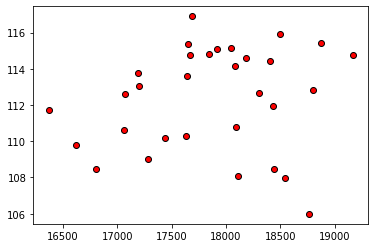

In [79]:
plt.scatter(x, xx, marker="o", facecolors="red", edgecolors="black")

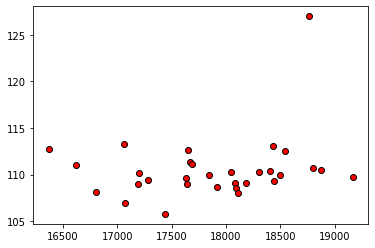

In [80]:
x = A_df["Avg Attendance"]
y= A_df["Away Team PPG"]
plt.scatter(x, y, marker="o", facecolors="red", edgecolors="black")

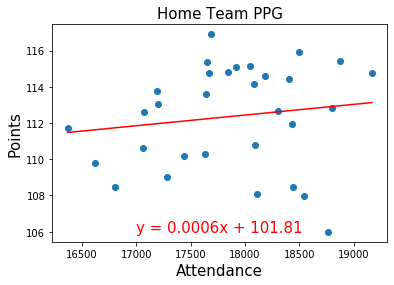

<Figure size 432x288 with 0 Axes>

In [91]:
x_values = A_df["Avg Attendance"]
y_values = A_df["PPG at Home"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17000,106),fontsize=15,color="red")
plt.xlabel('Attendance', fontsize=15)
plt.ylabel('Points', fontsize=15)
plt.title("Home Team PPG",fontsize=15)
plt.show()
plt.savefig("../HomeTeamAvgPPG.png")

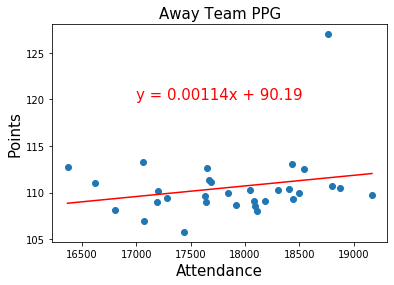

<Figure size 432x288 with 0 Axes>

In [82]:
x_values = A_df["Avg Attendance"]
y_values = A_df["Away Team PPG"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17000,120),fontsize=15,color="red")
plt.xlabel('Attendance', fontsize=15)
plt.ylabel("Points", fontsize=15)
plt.title('Away Team PPG', fontsize=15)
plt.show()
plt.savefig("../AwayTeamAvgPPG.png")

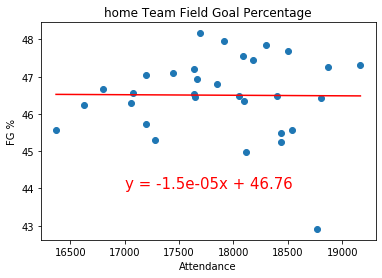

<Figure size 432x288 with 0 Axes>

In [95]:
x_values = A_df["Avg Attendance"]
y_values = A_df["Field Goal Percentage"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,6)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17000,44),fontsize=15,color="red")
plt.xlabel('Attendance')
plt.ylabel('FG %')
plt.title("home Team Field Goal Percentage")
plt.show()
plt.savefig("../HomeTeamFG5.png")

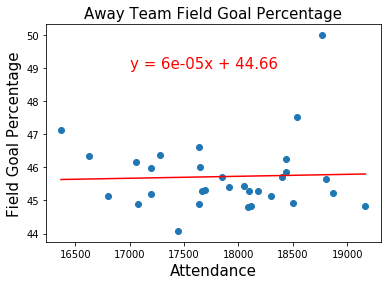

<Figure size 432x288 with 0 Axes>

In [84]:
x_values = A_df["Avg Attendance"]
y_values = A_df["Away Field Goal Percentage"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17000,49),fontsize=15,color="red")
plt.xlabel('Attendance', fontsize=15)
plt.ylabel('Field Goal Percentage', fontsize=15)
plt.title('Away Team Field Goal Percentage', fontsize=15)
plt.show()
plt.savefig("../AwayTeamFG%.png")

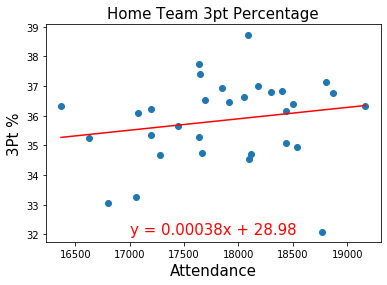

<Figure size 432x288 with 0 Axes>

In [93]:
x_values = A_df["Avg Attendance"]
y_values = A_df["3 PT Percentage"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17000,32),fontsize=15,color="red")
plt.xlabel('Attendance', fontsize=15)
plt.ylabel('3Pt %', fontsize=15)
plt.title("Home Team 3pt Percentage", fontsize=15)
plt.show()
plt.savefig("../HomeTeam3pt.png")

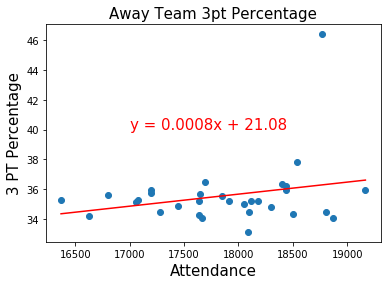

<Figure size 432x288 with 0 Axes>

In [86]:
x_values = A_df["Avg Attendance"]
y_values = A_df["Away 3 PT Percentage"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17000,40),fontsize=15,color="red")
plt.xlabel('Attendance', fontsize=15)
plt.ylabel('3 PT Percentage', fontsize=15)
plt.title("Away Team 3pt Percentage", fontsize=15)
plt.show()
plt.savefig("../AwayTeam3pt.png")

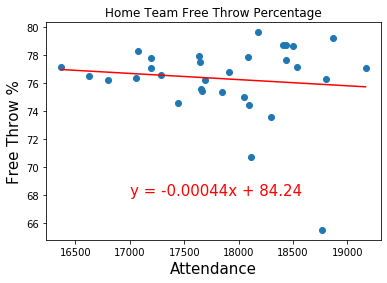

In [94]:
x_values = A_df["Avg Attendance"]
y_values = A_df["Free Throw Percentage"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,5)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17000,68),fontsize=15,color="red")
plt.xlabel('Attendance', fontsize=15)
plt.ylabel('Free Throw %', fontsize=15)
plt.title("Home Team Free Throw Percentage")
plt.show()
# plt.savefig("../HomeTeamFT%.png")

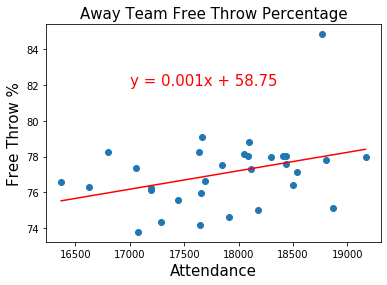

<Figure size 432x288 with 0 Axes>

In [89]:
x_values = A_df["Avg Attendance"]
y_values = A_df["Away Free Throw Perentage"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(17000,82),fontsize=15,color="red")
plt.xlabel('Attendance', fontsize=15)
plt.ylabel('Free Throw %', fontsize=15)
plt.title("Away Team Free Throw Percentage", fontsize=15)
plt.show()
plt.savefig("../AwayTeamFT%.png")